<a href="https://colab.research.google.com/github/estrelmm/Data-Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*




  # Índices Estatísticos da Violência no Rio de Janeiro 

---
<center><img alt="Analisando Airbnb" width="100%" src="https://www.telegraph.co.uk/content/dam/Travel/Destinations/South%20America/Brazil/Rio%20de%20Janeiro/rio-christ-guide-lead.jpg?imwidth=1240"></center>



Rio de Janeiro é um dos maiores destinos turístico no Brasil, bem conhecido pela estátua do Cristo Redentor, Corcovado, Pão de Açúcar, Praias de Copacabana, Ipanema e Barra da Tijuca, além das atividades e patrimônio culturais. Segundo a CNC.org em 2019 o Rio teve um faturamento de R$25,5 bilhões com serviços turísticos.

O estado do Rio tem a terceira maior população com 17,2 milhões de habitantes e segundo maior PIB entre os estados brasileiros com R$671 bilhões [Dados 2017 IBGE](https://www.ibge.gov.br/).



Entretanto, assim como qualquer grande capital, o Rio de Janeiro trabalha no combate a violência, que é apontado com um dos grandes problemas socioeconômicos do país. 


Para acompanhar os indíces de criminalidade, o Governo disponibiliza através do [Portal ISP DADOS](https:/http://www.ispdados.rj.gov.br//) indicadores estatísticos segmentado por tipo de ocorrência, conforme será apresentado neste *dataset*

## Obtenção dos Dados

Este *dataset* está disponível no [Portal ISP Dados](https:/http://www.ispdados.rj.gov.br//) página de Dados Abertos do Instituto de Segurança Pública que são construídos a partir dos Registros de Ocorrência (RO) averbado nas Delegacias da Secretaria do Estado de Policita Militar do Rio de Janeiro. As estatisticas produzidas baseiam-se na data do registro de ocorrência.

Está disponível no [Visualização](https:/http://www.ispvisualizacao.rj.gov.br//) painéis interativos com mapeamento por tipo de área e de ocorrência.

O dataset contém 56 tipos de ocorrências (variáveis). Nesta análise será destacado apenas para algumas das variáveis. É importante realçar que este é um dataset com dados de grande intervalo de tempo, desde 1991, sendo que para alguma das variáveis teve inicio de contabilização anos depois. Além disso, houveram alterações e dados faltantes, de acordo com ISPDadosRJ. 

Para detalhar melhor o significado de cada tipo de ocorrência consultar [Dicionário Variaveis](https:/http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx/)


### Importando os dados



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')


## Análise Inicial dos Dados

Para uma análise inicial dos dados é necessário entender o layout do *dataset*, como por exemplo o tamanho, quantidade e quais os tipos das variáveis, nomes das colunas e verificação da existência de valores nulos. Fatores que influenciam na exploração e análise.


A função ``shape`` verifica que neste dataframe existem 344 Entradas (linhas) e 56 Variaveis (colunas)

In [27]:
#Qual o tamanho do seu DataFrame

df.shape

#ou 

print("Variáveis: ", df.shape[1]);
print("Entradas: ", df.shape[0]);

Variáveis:  56
Entradas:  344


Esta função disponibiliza o nome das 56 variáveis ( colunas) deste *dataset*.

In [28]:
# Extrair e imprimir os nomes das colunas

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

## Dicionário das Variáveis

* vano - ano da ocorrência do ato de violência

* mes - mês da ocorrência do ato de violência

* hom_doloso - quantidade de homícidios dolosos

* lesao_corp_morte - quantidade de lesões corporais seguidas de morte

* latrocinio - quantidade de latrocínios

* hom_por_interv_policial - quantidade de homícidios por intervenção policial

* tentat_hom - quantidade de tentativas de homicídios

* lesao_corp_dolosa - quantidade de lesões corporais dolosas

* estupro - quantidade de estupros

* hom_culposo - quantidade de homicídios culposos

* lesao_corp_culposa - quantidade de lesões corporais culposas

* roubo_comercio - quantidade de roubos em comércios

* roubo_residencia - quantidade de roubos em residências

* roubo_veiculo - quantidade de roubos de veículos

* roubo_carga - quantidade de roubos de carga

* roubo_transeunte - quantidade de roubos a transeuntes

* roubo_em_coletivo - quantidade de roubos coletivos

* roubo_banco - quantidade de roubos a bancos

* roubo_cx_eletronico - quantidade de roubos a caixas eletrônicos

* roubo_celular - quantidade de roubos de aparelhos celulares

* roubo_conducao_saque - quantidade de roubos em condução para saque de dinheiro em espécie

* roubo_apos_saque - quantidade de roubos após o saque de dinheiro em espécie

* roubo_bicicleta - quantidade de roubos de bicicletas

* outros_roubos - quantidade de outros tipos de roubos não listados acima

* total_roubos - quantidade de total de roubos

* furto_veiculos - quantidade de furtos de veículos

* furto_transeunte - quantidade de furtos a transeuntes

* furto_coletivo - quantidade de furtos coletivos

* furto_celular - quantidade de furtos de aparelhos celulares

* furto_bicicleta - quantidade de furtos de bicicletas

* outros_furtos - quantidade de outro tipos de furtos não listados acima

* total_furtos - quantidade total de furtos

* sequestro - quantidade de sequestros

* extorsao - quantidade de extorsões

* sequestro_relampago - quantidade de sequestros relâmpago

* estelionato - quantidade de estelionatos

* apreensao_drogas - quantidade de apreensão de drogas

* posse_drogas - quantidade de posse de drogas

* trafico_drogas - quantidade de tráfico de drogas

* apreensao_drogas_sem_autor - quantidade de apreensões de drogas sem autor

* recuperacao_veiculos - quantidade de recuperação de veículos

* apf - quantidade de autos de prisão em flagrante

* aaapai - quantidade de autos de apreensão de adolescente por ato infracional

* cmp - quantidade de cumprimento de Mandado de Prisão

* cmba - quantidade Cumprimento de Mandado de Busca e Apreensão 

* ameaca - quantidade de ameaças

* pessoas_desaparecidas - quantidade de pessoas desaparecidas

* encontro_cadaver - quantidade de encontro de cadáveres

* encontro_ossada - quantidade de encontro de ossadas

* pol_militares_mortos_serv - quantidade de policiais militares mortos em serviço

* pol_civis_mortos_serv - quantidade de policiais civis mortos em serviço

* indicador_letalidade - indicador de letalidade

* indicador_roubo_rua - indicador de roubos de rua

* indicador_roubo_veic - indicador de roubos de veículos

* registro_ocorrencias - registros de ocorrências

* fase - Se: 2 - Consolidado sem errata,    Se: 3 - Consolidado com errata

Abrir o dataframe pelo tipo das variáveis facilita para entender se são tipo numero inteiros, float, datatime ou string.

In [29]:
# Quais os tipos das Variaveis? 

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Como verificado, este *dataset* trouxe datas em formato str, a função abaixo usada para criar um nova variável chamada data e transforma-la em type datetime, alem disso, trasformar de variavel para index, que será de eixo referencia no plot de grafico

In [30]:
df['data'] =df.vano.astype(str) + "/" + df.mes.astype(str)

df.data = pd.to_datetime(df.data, format ='%Y/%m')

df.set_index('data', inplace=True)

Para visualizar as primeiras e últimas entradas deste *dataset* e verificar como os dados estão apresentados.

In [31]:
# Visualizar as 5 primeiras linhas

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991-02-01,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991-03-01,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991-04-01,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991-05-01,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [32]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
2019-05-01,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
2019-06-01,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
2019-07-01,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
2019-08-01,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Infelizmente não há como garantir que o *dataset* esteja 100% com valores preenchido. A função ``isnull`` identifica nas variáveis a quantidades de valores ausentes, o que é um fato importante para tomada de decisão sobre a exploração dos dados.

Neste *dataset* verificamos através da função abaixo que há pelo menos 80% de dados faltantes para as variáveis roubo_e_furto_bicicleta, além dos demais apresentados com percentual menor de dados faltantes.

In [33]:
# Identifique a porcentagem de valores ausentes das colunas

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Soma das quantidades de ocorrência por variável

In [34]:
df.sum().sort_values(ascending=False)

registro_ocorrencias          13340952.0
total_furtos                   3589013.0
total_roubos                   3243273.0
outros_furtos                  2062049.0
lesao_corp_dolosa              1889523.0
indicador_roubo_rua            1628750.0
ameaca                         1371521.0
roubo_transeunte               1175971.0
lesao_corp_culposa              845869.0
indicador_roubo_veic            842352.0
roubo_veiculo                   842352.0
vano                            689664.0
recuperacao_veiculos            609650.0
furto_veiculos                  576087.0
furto_transeunte                522509.0
estelionato                     446372.0
outros_roubos                   416661.0
apf                             380412.0
apreensao_drogas                368744.0
furto_celular                   289835.0
roubo_em_coletivo               226697.0
roubo_celular                   226082.0
cmp                             205904.0
indicador_letalidade            198726.0
hom_doloso      

## Informações Estatísticas da Violência no Rio de Janeiro

Os indíces de criminalidade é um grave problema econômico social, afeta tanto a qualidade e expectativa de vida dos cidadãos quanto no aumento de gastos pelo Estados e na perda de receita, principalmente no setor turistico. 

Indíces elevados de criminalidade são um grave problema que afeta tanto a qualidade e expectativa de vida dos cidadãos, quanto no aumento de gastos públicos e perda de receita, principalmente do setor turistico.

Na função de verificação de valores nulos acima, checamos que as variáveis roubo_veiculo, furto_veiculo e recuperacao_veiculo estão com 100% de dados.

Na função ``describe`` é usada para verificar a estatística individual por variável, com objetivo de identificar Outliers e entender como a distribuição dos dados se apresenta.

In [35]:
# Resumo Estatistico

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Grafico de linha plotado individualmente para as variáveis ``Roubo_Veiculos``, ``Furto_Veiculos`` e ``Recuperacao de Veiculo``. 

Roubo e Furtos são alguns dos casos com maior número de ocorrência. Por mês são registrado em média 2.400 para ocorrência de roubo e 1700 para ocorrência de furto. 

No período verifica-se queda no número de casos, sinal de que a ação do estado tem sido eficiente, porém apenas 42.98% são recuperados sobre o total de veículos perdidos. 

Estes índices são os principais balizador que impactam no setor das seguradoras de automóveis, resultando em custo alto das apólices e consequentemente é repassado no preço para o consumidor.

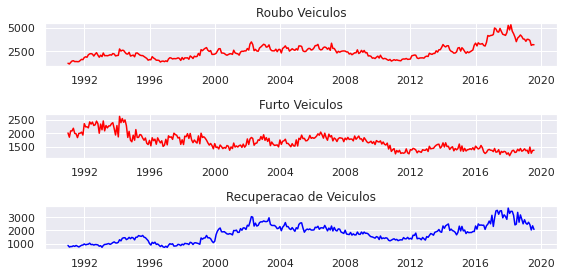

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (8, 4))

ax[0].plot('roubo_veiculo', data=df, color="red")
ax[1].plot('furto_veiculos', data=df, color="red")
ax[2].plot('recuperacao_veiculos', data=df, color="blue")

ax[0].set_title('Roubo Veiculos')
ax[1].set_title('Furto Veiculos')
ax[2].set_title('Recuperacao de Veiculos')

sns.set(style="darkgrid")

plt.tight_layout()

In [37]:
print(df['roubo_veiculo'].mean());
print(df['furto_veiculos'].mean());
print(df['recuperacao_veiculos'].mean());

2448.6976744186045
1674.671511627907
1772.2383720930231


In [38]:
# ver a média da variável recuperacao_veiculos
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
mean_roubo_veiculo = df.roubo_veiculo.mean()
mean_furto_veiculos = df.furto_veiculos.mean() 

# total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Veículos Recuperados por Mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


Criei um novo Dataframe df_2019 para avaliar a quantidade de ocorrencias para 2019 isoladamente. Em seguida usei novamente a funçao ``isnull`` para verificar a quantidade de nulos para 2019

In [39]:
df_2019 = df.loc['2019']

(df_2019.isnull().sum() / df_2019.shape[0]).sort_values(ascending=False)


fase                          0.0
registro_ocorrencias          0.0
furto_veiculos                0.0
total_roubos                  0.0
outros_roubos                 0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_celular                 0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_carga                   0.0
roubo_veiculo                 0.0
roubo_residencia              0.0
roubo_comercio                0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
hom_por_interv_policial       0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
mes                           0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular 

Com esta função é para apenas identificar o numero de casos que mais se repete. Os crimes tipo roubo ou furto aparecem mais vezes neste *dataset*

In [40]:
df_2019.sum().sort_values(ascending=False)[:]

registro_ocorrencias          535113.0
total_roubos                  141472.0
total_furtos                  105495.0
indicador_roubo_rua            85513.0
outros_furtos                  61336.0
roubo_transeunte               55717.0
lesao_corp_dolosa              42335.0
ameaca                         40592.0
indicador_roubo_veic           28012.0
roubo_veiculo                  28012.0
estelionato                    26178.0
apf                            24179.0
recuperacao_veiculos           19387.0
roubo_celular                  18660.0
lesao_corp_culposa             18274.0
outros_roubos                  17385.0
vano                           16152.0
apreensao_drogas               15572.0
furto_transeunte               14279.0
cmp                            12938.0
furto_celular                  12094.0
roubo_em_coletivo              11136.0
furto_veiculos                 10812.0
trafico_drogas                  8449.0
posse_drogas                    5950.0
furto_coletivo           

Com a função ``loc`` criei novos dataframes por grupo de criminalidade apenas para o quais tem valores relevantes

In [41]:

df_roubos_furtos = df_2019.loc(axis=1)['roubo_transeunte','roubo_celular',
                        'outros_roubos','roubo_em_coletivo','outros_furtos','furto_transeunte',
                        'furto_celular','furto_coletivo']

df_Int_Fisica = df_2019.loc(axis=1)['lesao_corp_dolosa','lesao_corp_culposa',
                                    'estupro','hom_por_interv_policial',
                                    'hom_culposo','ameaca']
                                    
df_Drogas = df_2019.loc(axis=1)['trafico_drogas','posse_drogas','apreensao_drogas_sem_autor']

In [42]:
df_2017 = df.loc['2017']
df_2018 = df.loc['2018']

Casos que diretamente envolve o pedestre e também é uma das estatísticas mais relatadas por turistas que são aconselhados a não expor seus pertences enquanto estiverem em pontos turisticos por exemplo. Aproximadamente 200mil destas ocorrências foram registradas até agosto de 2019.

Plot de grafico do grupo ``roubos_furtos`` valores até agosto de 2019

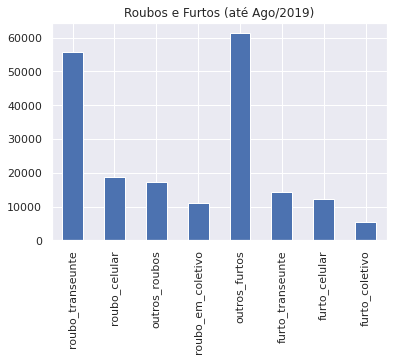

In [43]:
fig, ax= plt.subplots()

ax=df_roubos_furtos.sum().plot.bar();
ax.set_title('Roubos e Furtos (até Ago/2019)')

plt.show()

Roubos e Furtos ate agosto de 2019 - somam aproximadamente 200 mil ocorrências

In [44]:
df_roubos_furtos.sum()

roubo_transeunte     55717.0
roubo_celular        18660.0
outros_roubos        17385.0
roubo_em_coletivo    11136.0
outros_furtos        61336.0
furto_transeunte     14279.0
furto_celular        12094.0
furto_coletivo        5411.0
dtype: float64



## Crimes Contra a Vida

Os crimes de homicídios apresentam variação de queda no decorrer dos últimos anos, resultado referente ao endurecimento da segurança pública no atual governo, segundo os jornais.

Em 2017 a média de casos era de 445 , em 2018 caiu para 412, e para 2019 a média de 339 homicídios registrados até agosto de 2019.



In [45]:
# Encontre os valores máximos (max) e mínimos (min) da coluna hom_doloso

print(df.hom_doloso.max());
print(df.hom_doloso.min());

831
272


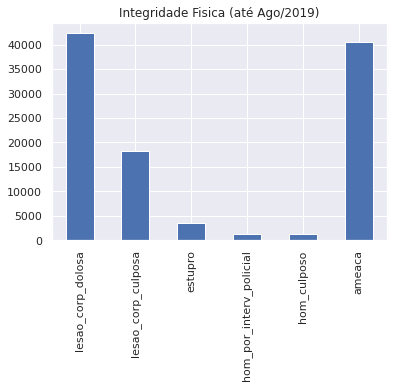

In [46]:
fig, ax= plt.subplots()

ax=df_Int_Fisica.sum().plot.bar();
ax.set_title('Integridade Fisica (até Ago/2019)')

plt.show()


In [47]:
df_Int_Fisica.sum()

lesao_corp_dolosa          42335.0
lesao_corp_culposa         18274.0
estupro                     3592.0
hom_por_interv_policial     1249.0
hom_culposo                 1239.0
ameaca                     40592.0
dtype: float64

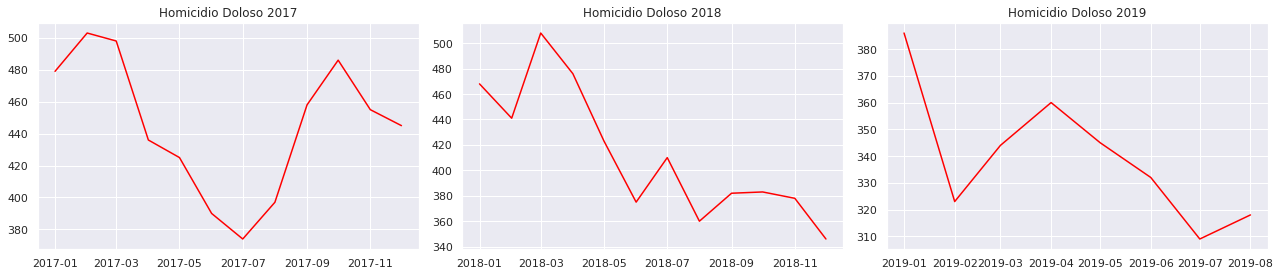

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18, 4))

ax[0].plot('hom_doloso', data=df_2017, color="red")
ax[1].plot('hom_doloso', data=df_2018, color="red")
ax[2].plot('hom_doloso', data=df_2019, color="red")

ax[0].set_title('Homicidio Doloso 2017')
ax[1].set_title('Homicidio Doloso 2018')
ax[2].set_title('Homicidio Doloso 2019')

plt.tight_layout()
fig.autofmt_xdate

plt.show()

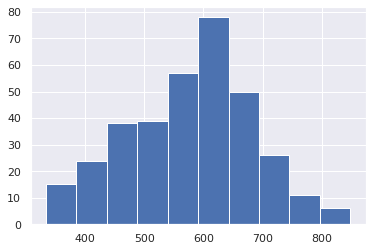

In [58]:
df.indicador_letalidade.hist();

In [50]:
df.indicador_letalidade

data
1991-01-01    672
1991-02-01    749
1991-03-01    738
1991-04-01    654
1991-05-01    670
             ... 
2019-04-01    496
2019-05-01    534
2019-06-01    496
2019-07-01    518
2019-08-01    495
Name: indicador_letalidade, Length: 344, dtype: int64

In [51]:
print(df_2017['hom_doloso'].mean());
print(df_2018['hom_doloso'].mean());
print(df_2019['hom_doloso'].mean());

445.5
412.5
339.625


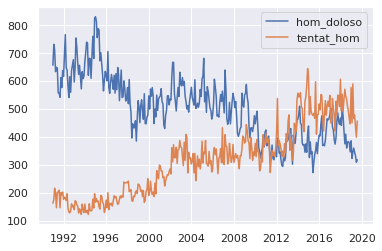

In [52]:
fig, ax = plt.subplots()

ax.plot('hom_doloso', data= df)
ax.plot('tentat_hom', data= df)

ax.legend()

plt.show()




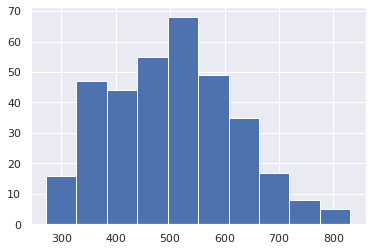

In [53]:
#Histograma de hom_doloso

df.hom_doloso.hist();

sns.set(style="darkgrid")

## Drogas Ilícitas

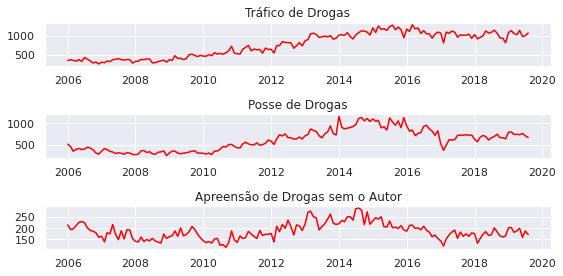

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (8, 4))

ax[0].plot('trafico_drogas', data=df, color="red")
ax[1].plot('posse_drogas', data=df, color="red")
ax[2].plot('apreensao_drogas_sem_autor', data=df, color="red")

ax[0].set_title('Tráfico de Drogas')
ax[1].set_title('Posse de Drogas')
ax[2].set_title('Apreensão de Drogas sem o Autor')

plt.tight_layout()
fig.autofmt_xdate

plt.show()



In [55]:
df_Drogas.sum()

trafico_drogas                8449.0
posse_drogas                  5950.0
apreensao_drogas_sem_autor    1486.0
dtype: float64

## Conclusão

A questão do controle da criminalidade requer investimento na educação, políticas públicas e comprometimento das autoridades para que tais índices melhorem a partir da causa da raíz do problema.  

Embora tenha havido queda de variação para alguns dos índices e crescimento para outros, de fato, os números apresentados são alarmantes e além do mais, trazem algum prejuízo na imagem do Rio de Janeiro se tratando de segurança.  

O setor turístico ainda é um forte aliado da economia do Rio de Janeiro, por isso é usual do estado tomar iniciativas pontuais de investimento na segurança ou em apenas em locais turísticos e talvez isso esteja sendo um paliativo para que o Rio continue ainda sendo um destino atrativo. 